In [ ]:
#Open project in Google colab
import pandas as pd
from pandas import DataFrame
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from matplotlib import rcParams
import plotly.graph_objects as go
import plotly.express as px
from plotly.colors import n_colors
import numpy as np
import seaborn as sns
import pandas_profiling
%matplotlib inline
from matplotlib import rc
import scipy.stats
import io
from sklearn.model_selection import train_test_split #for splitting the dataset.
from sklearn import preprocessing #used to scale variables
from sklearn.preprocessing import LabelEncoder # Use to assign integer values to all string values using Label Encoder for categorical variables.
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
import statsmodels.api as sm #for making a linear regression model
from mlxtend.feature_selection import SequentialFeatureSelector as SFS #for step forward feature selection
from sklearn.tree import DecisionTreeRegressor #for making decion tree model
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import export_graphviz #use to visualize and classification tree - COMMENT OUT IF USING JUPYTER NOTEBOOK
from sklearn.ensemble import RandomForestRegressor

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning:

sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.



In [ ]:
from google.colab import files 
  
  
uploaded = files.upload()


In [ ]:
newyork = pd.read_csv(io.BytesIO(uploaded['AB_NYC_2019.csv']))  #reading the file


In [ ]:
newyork.head(5)

id  ... availability_365
0  2539  ...              365
1  2595  ...              355
2  3647  ...              365
3  3831  ...              194
4  5022  ...                0

[5 rows x 16 columns]

In [ ]:
newyork.shape  # Dead code

(48895, 16)

In [ ]:
newyork.columns #Dead code

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
#Data Exploration
newyork.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
newyork.describe() # only needed for numeric variables , modifying to newyork.describe(include = [np.number]).T

id  ...  availability_365
count  4.889500e+04  ...      48895.000000
mean   1.901714e+07  ...        112.781327
std    1.098311e+07  ...        131.622289
min    2.539000e+03  ...          0.000000
25%    9.471945e+06  ...          0.000000
50%    1.967728e+07  ...         45.000000
75%    2.915218e+07  ...        227.000000
max    3.648724e+07  ...        365.000000

[8 rows x 10 columns]

In [ ]:
newyork.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:
newyork.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [ ]:
newyork.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [ ]:
newyork.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
newyork.fillna({'name':"Null"}, inplace=True) 

In [ ]:
#percentage of empty values in last reviews
last_review = newyork.last_review
percent_last_review = (last_review.isnull().sum()/(len(newyork)*1.0))*100
percent_last_review

20.55833929849678

In [ ]:
#percentage of empty values in reviews per month
reviews_per_month = newyork.reviews_per_month
percent_reviews_per_month = (reviews_per_month.isnull().sum()/(len(newyork)*1.0))*100
percent_reviews_per_month

20.55833929849678

In [ ]:
# Data Cleaning Step 1
#Dropping unnecessary columns
newyork.drop(['last_review','reviews_per_month'], axis=1, inplace=True) 

In [ ]:
newyork.drop(['host_name'], axis=1, inplace=True)

In [ ]:
newyork.isnull().sum()

id                                0
name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
#Data Cleaning Step 2
#Remove listings with price $0
newyork.drop(newyork.loc[newyork['price']==0].index, inplace=True)

In [ ]:
newyork['price'].min()

10

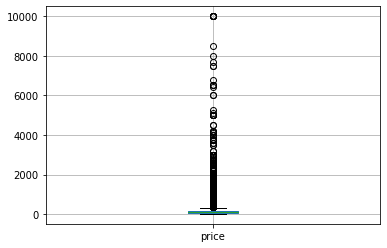

In [ ]:
boxplot = newyork.boxplot(column=['price'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



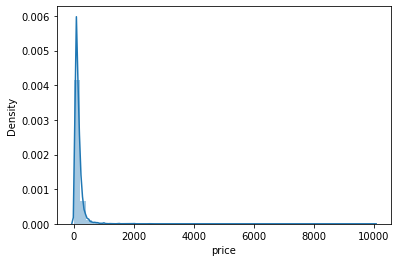

In [ ]:
sns.distplot(newyork['price'])

In [ ]:
#Data Cleaning Step 3
#Keep rows where Price is within 3 s.d 
z_score_price = np.abs(scipy.stats.zscore(newyork['price']))
price_outliers = newyork.iloc[np.where(z_score_price>3)]
price_outliers.sort_values(['price'])

id  ... availability_365
44476  34253279  ...              365
8805    6758849  ...               35
41224  32065845  ...              301
2040     909859  ...              341
40032  31088862  ...                0
...         ...  ...              ...
40433  31340283  ...              365
12342   9528920  ...               83
9151    7003697  ...                0
29238  22436899  ...               83
17692  13894339  ...                0

[388 rows x 13 columns]

In [ ]:
newyork.drop(price_outliers.index, inplace=True)


In [ ]:
newyork.shape

(48496, 13)

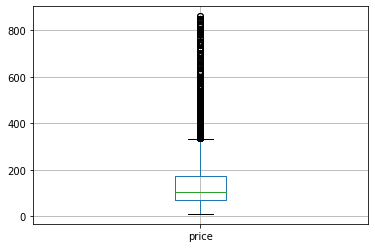

In [ ]:
boxplot = newyork.boxplot(column=['price'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



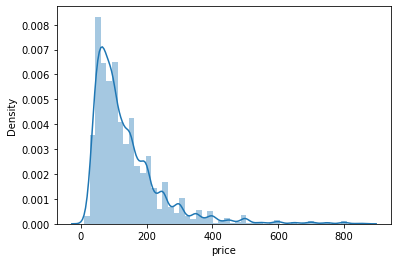

In [ ]:
sns.distplot(newyork['price'])

In [ ]:
#Remove rows where availabilty_365=0 && reviews=0
newyork.drop(newyork.loc[(newyork['availability_365']==0) & (newyork['number_of_reviews']==0)].index, inplace=True)

In [ ]:
newyork.shape

(43723, 13)

In [ ]:
newyork.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43723 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              43723 non-null  int64  
 1   name                            43723 non-null  object 
 2   host_id                         43723 non-null  int64  
 3   neighbourhood_group             43723 non-null  object 
 4   neighbourhood                   43723 non-null  object 
 5   latitude                        43723 non-null  float64
 6   longitude                       43723 non-null  float64
 7   room_type                       43723 non-null  object 
 8   price                           43723 non-null  int64  
 9   minimum_nights                  43723 non-null  int64  
 10  number_of_reviews               43723 non-null  int64  
 11  calculated_host_listings_count  43723 non-null  int64  
 12  availability_365                

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



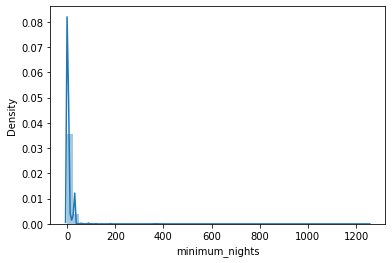

In [ ]:
sns.distplot(newyork['minimum_nights'])

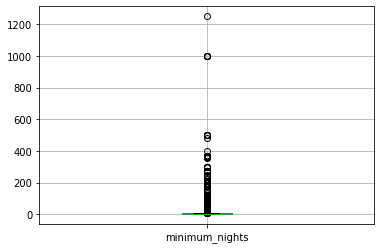

In [ ]:
boxplot = newyork.boxplot(column=['minimum_nights'])

In [ ]:
newyork = newyork[newyork['minimum_nights'] < 999]

In [ ]:
final_dataset=newyork
#Pre-Processing step
#Assign integer values to all string values using Label Encoder for categorical variables.
le = LabelEncoder()
final_dataset['neighbourhood_group'] = le.fit_transform(final_dataset['neighbourhood_group'])
final_dataset['neighbourhood'] = le.fit_transform(final_dataset['neighbourhood'])
final_dataset['room_type'] = le.fit_transform(final_dataset['room_type'])

final_dataset.head()


id  ... availability_365
0  2539  ...              365
1  2595  ...              355
2  3647  ...              365
3  3831  ...              194
4  5022  ...                0

[5 rows x 13 columns]

In [ ]:
from google.colab import files
final_dataset.to_csv('filename.csv') 
files.download('filename.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Splitting the data set in to training and test data sets
feature_cols = ['neighbourhood_group','neighbourhood','room_type','minimum_nights','number_of_reviews',
                                                 'calculated_host_listings_count','availability_365']
x = final_dataset[feature_cols]
y = final_dataset.price # Target variable

# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 70% training and 30% test

#view number of training and testing data
print('Our training prediction set contains :',len(y_train) ,'rows')
print('Our training independent set contains :',len(x_train) ,'rows')
print('Our testing prediction set contains :',len(y_test) ,'rows')
print('Our testing independent set contains :',len(x_test) ,'rows')

Our training prediction set contains : 30602 rows
Our training independent set contains : 30602 rows
Our testing prediction set contains : 13116 rows
Our testing independent set contains : 13116 rows


In [ ]:
reg_model_p = LinearRegression(normalize=False)
#fitting the training data to the model,
reg_model_p.fit(x_train, y_train)
#outputs the coefficients
print('Intercept :', reg_model_p.intercept_, '\n')
print(pd.DataFrame({'features':x_train.columns,'coefficients':reg_model_p.coef_}))


Intercept : 156.2891888401492 

                         features  coefficients
0             neighbourhood_group      4.856143
1                   neighbourhood      0.123435
2                       room_type    -96.492420
3                  minimum_nights     -0.338415
4               number_of_reviews     -0.167204
5  calculated_host_listings_count      0.200953
6                availability_365      0.120373


In [ ]:
#prediction
lr_pred_p = reg_model_p.predict(x_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lr_pred_p))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lr_pred_p))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lr_pred_p)))
score = r2_score(y_test, lr_pred_p)
print('Score:',score)

Mean Absolute Error: 56.77854547073588
Mean Squared Error: 7859.964053994858
Root Mean Squared Error: 88.65643831101528
Score: 0.290029260731707


In [ ]:
features = final_dataset[feature_cols]
target = final_dataset['price']

#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(features)
X_1
#Fitting sm.OLS model
model = sm.OLS(target,X_1).fit()
model.pvalues

const                              0.000000e+00
neighbourhood_group                1.766389e-19
neighbourhood                      1.381324e-79
room_type                          0.000000e+00
minimum_nights                     1.306222e-43
number_of_reviews                  5.222489e-71
calculated_host_listings_count     1.626668e-53
availability_365                  4.529349e-257
dtype: float64

In [ ]:
#Backward Elimination
cols = list(features.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = features[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(target,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['neighbourhood_group', 'neighbourhood', 'room_type', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']


In [ ]:
#Recurvsive feature selection - no of features
nof_list=np.arange(1,7)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(features,target, test_size = 0.25, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train.values.ravel())
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train.values.ravel())
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 6
Score with 6 features: 0.255266


In [ ]:
cols = list(features.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 12)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(features,target.values.ravel())  
#Fitting the data to model
model.fit(X_rfe,target)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['neighbourhood_group', 'neighbourhood', 'room_type', 'minimum_nights',
       'number_of_reviews', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


In [ ]:
#Sequential backward selection(sbs)
sbs = SFS(LinearRegression(),
         k_features=7,
         forward=False,
         floating=False,
        scoring='r2',
         cv=0)
sbs.fit(x_train, y_train)
sbs.k_feature_names_

('neighbourhood_group',
 'neighbourhood',
 'room_type',
 'minimum_nights',
 'number_of_reviews',
 'calculated_host_listings_count',
 'availability_365')

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning:

Degrees of freedom <= 0 for slice

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning:

invalid value encountered in double_scalars



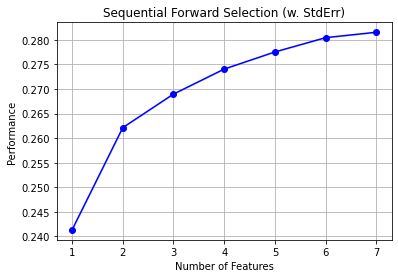

In [ ]:
sfs1 = SFS(LinearRegression(),
         k_features=(1,7),
         forward=True,
         floating=False,
         cv=0)
sfs1.fit(x_train, y_train)
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [ ]:
dtree = DecisionTreeRegressor()
model = dtree.fit(x_train, y_train)  #train parameters: features and target
dtree_pred = dtree.predict(x_test)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0218763 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0218763 to fit



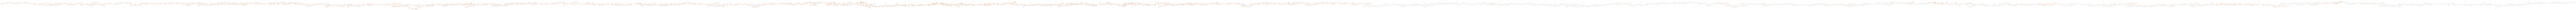

In [ ]:
#Visualize the minimal error classification tree
#export graphviz doesn't work in Jupyter Notebook - COMMENT OUT IF USING JUPYTER NOTEBOOK 
from sklearn.externals.six import StringIO  #use to visualize and classification tree 
from IPython.display import Image  #use to visualize and classification tree
import pydotplus #use to visualize and classification tree
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,   
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1']) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Air BNB prices.png')
Image(graph.create_png())
files.download('Air BNB prices.png') # the tree is too large and cannot be seen in one single screen. Need to prune the tree

In [ ]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, dtree_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, dtree_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, dtree_pred)))


Mean Absolute Error: 63.081729320237145
Mean Squared Error: 12065.73666684422
Root Mean Squared Error: 109.84414716699392


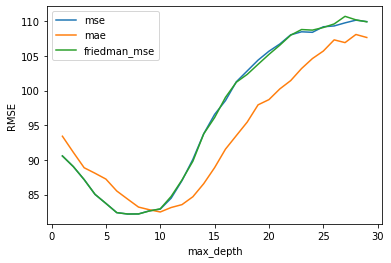

In [ ]:
max_depth = []
acc_mse = []
acc_mae= []
acc_friedman_mse = []
for i in range(1,30):
    dtree = DecisionTreeRegressor(criterion='mse', max_depth=i)
    dtree.fit(x_train, y_train)
    pred = dtree.predict(x_test)
    acc_mse.append(np.sqrt(metrics.mean_squared_error(y_test, pred)))
    dtree = DecisionTreeRegressor(criterion='mae', max_depth=i)
    dtree.fit(x_train, y_train)
    pred = dtree.predict(x_test)
    acc_mae.append(np.sqrt(metrics.mean_squared_error(y_test, pred)))
    ####
    dtree = DecisionTreeRegressor(criterion='friedman_mse', max_depth=i)
    dtree.fit(x_train, y_train)
    pred = dtree.predict(x_test)
    acc_friedman_mse.append(np.sqrt(metrics.mean_squared_error(y_test, pred)))
    ####
    max_depth.append(i)
    d = pd.DataFrame({'acc_mse':pd.Series(acc_mse), 
    'acc_mae':pd.Series(acc_mae),
    'acc_friedman_mse':pd.Series(acc_friedman_mse),
    'max_depth':pd.Series(max_depth)})
                                                
# visualizing changes in parameters
plt.plot('max_depth','acc_mse', data=d, label='mse')
plt.plot('max_depth','acc_mae', data=d, label='mae')
plt.plot('max_depth','acc_friedman_mse', data=d, label='friedman_mse')
plt.xlabel('max_depth')
plt.ylabel('RMSE')
plt.legend()

In [ ]:
#refitting with max depth 8
dtree_m = DecisionTreeRegressor(criterion='mae',max_depth = 8)
model = dtree_m.fit(x_train, y_train)  #train parameters: features and target
pred = dtree_m.predict(x_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error: 46.09271119243672
Mean Squared Error: 6929.077767612077
Root Mean Squared Error: 83.24108221072139


In [ ]:
#Random Forest Regressor
rf = RandomForestRegressor(random_state=1).fit(x_train, y_train.values.ravel())
rf_pred = rf.predict(x_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rf_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rf_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))

Mean Absolute Error: 49.03242552243638
Mean Squared Error: 6482.581676230073
Root Mean Squared Error: 80.51448115854733


In [ ]:
pip install xgboost

In [ ]:
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor

In [ ]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.01)

In [ ]:
GBoost.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
predict = GBoost.predict(x_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predict)))

Mean Absolute Error: 46.43763518632687
Mean Squared Error: 5818.318013332022
Root Mean Squared Error: 76.27789990116418


In [ ]:
print('r2 score is:')
r2 = r2_score(y_test,predict)
r2*100

r2 score is:


47.444600091728816

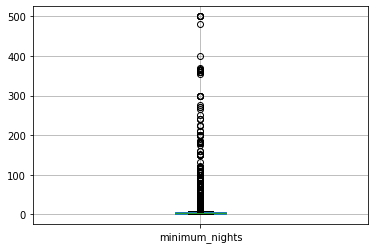

In [ ]:
boxplot = newyork.boxplot(column=['minimum_nights'])

In [ ]:
newyork.shape

(43718, 13)

In [ ]:
newyork.describe()

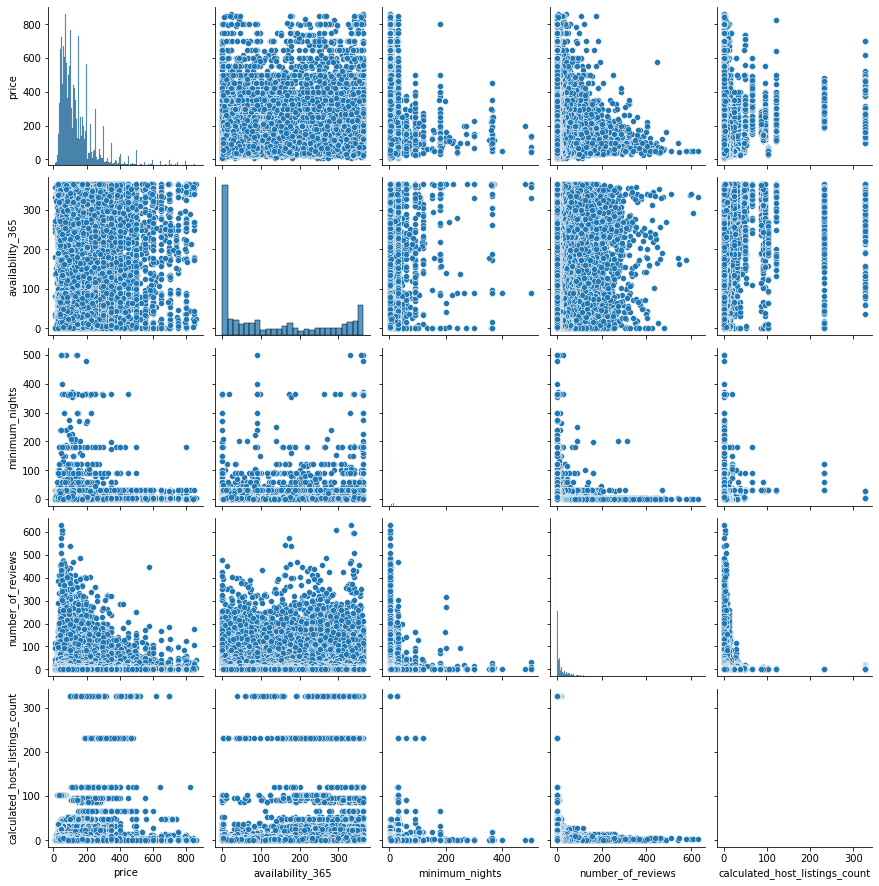

In [ ]:
sub_set = newyork[['price','availability_365','minimum_nights','number_of_reviews','calculated_host_listings_count']] 
sns.pairplot(sub_set)

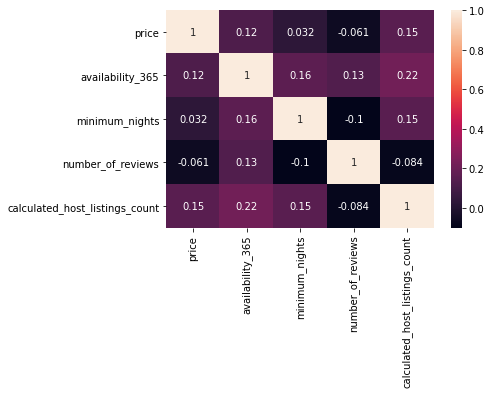

In [ ]:
corrMatrix = sub_set.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

Text(0.5, 1.0, 'neightbourhood groups')

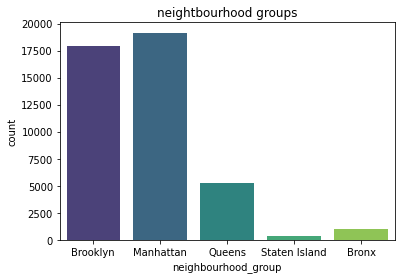

In [ ]:
# determine popularity based on neighbourhood_group
sns.countplot(x='neighbourhood_group',data=newyork,palette='viridis')
plt.title('neightbourhood groups')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



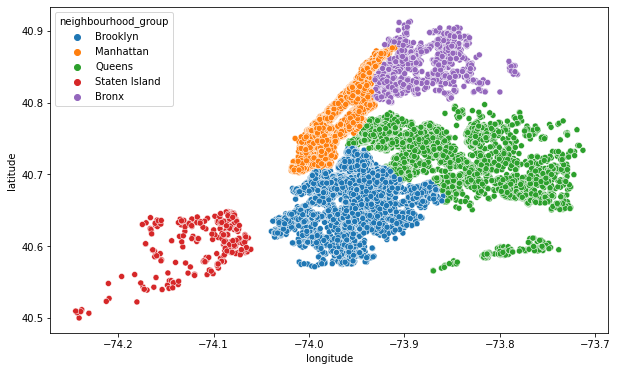

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(newyork.longitude,newyork.latitude,hue=newyork.neighbourhood_group)
plt.ioff()

In [ ]:
#Get a count by neighbourhood group
neighbourhood_group_count = newyork.groupby('neighbourhood_group').agg('count').reset_index()

In [ ]:
pip install geopandas

     |████████████████████████████████| 972kB 6.5MB/s 
     |████████████████████████████████| 6.5MB 20.6MB/s 
     |████████████████████████████████| 14.8MB 327kB/s 


In [ ]:
import geopandas
#Here we are using geopandas to bring in a base layer of NYC boroughs
nyc = geopandas.read_file(geopandas.datasets.get_path('nybb'))
nyc.head(5)

BoroCode  ...                                           geometry
0         5  ...  MULTIPOLYGON (((970217.022 145643.332, 970227....
1         4  ...  MULTIPOLYGON (((1029606.077 156073.814, 102957...
2         3  ...  MULTIPOLYGON (((1021176.479 151374.797, 102100...
3         1  ...  MULTIPOLYGON (((981219.056 188655.316, 980940....
4         2  ...  MULTIPOLYGON (((1012821.806 229228.265, 101278...

[5 rows x 5 columns]

In [ ]:
#Rename the column to boroname, so that we can join the data to it on a common field
nyc.rename(columns={'BoroName':'neighbourhood_group'}, inplace=True)
bc_geo = nyc.merge(neighbourhood_group_count, on='neighbourhood_group')

In [ ]:
bc_geo 

BoroCode  ... availability_365
0         5  ...              355
1         4  ...             5223
2         3  ...            17964
3         1  ...            19145
4         2  ...             1031

[5 rows x 17 columns]

In [ ]:
# from geopandas import GeoDataFrame
# bc_geo = GeoDataFrame(bc_geo)

In [ ]:
# type(bc_geo)

geopandas.geodataframe.GeoDataFrame

In [ ]:
pip install geoplot

     |████████████████████████████████| 14.4MB 341kB/s 
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command output.


(905464.7390380859, 1075092.8783935546, 112485.76063504723, 280480.4142594267)

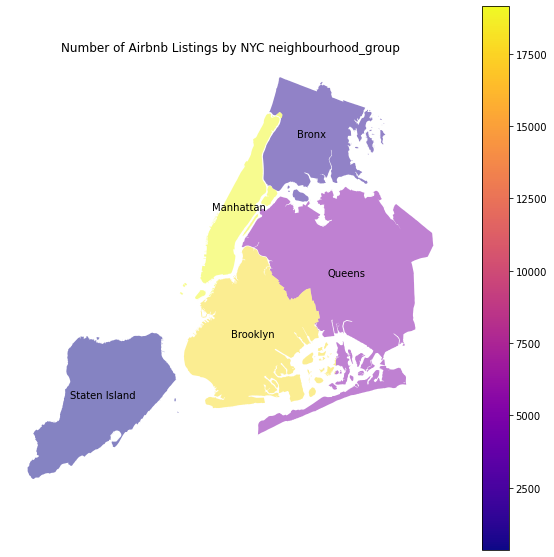

In [ ]:
#Plot the count by borough into a map
fig,ax = plt.subplots(1,1, figsize=(10,10))
bc_geo.plot(column= 'id', cmap='plasma', alpha=.5, ax=ax, legend=True)
bc_geo.apply(lambda x: ax.annotate(s=x.neighbourhood_group, color='black', xy=x.geometry.centroid.coords[0],ha='center'), axis=1)
plt.title("Number of Airbnb Listings by NYC neighbourhood_group")
plt.axis('off')

In [ ]:
# We can see that Manhattan and Broklyn are popular neighbourhood to rent a hourse

Text(0.5, 1.0, 'Different room types')

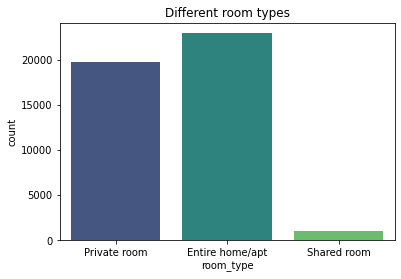

In [ ]:
# determine popularity based on room type
sns.countplot(x='room_type',data=newyork,palette='viridis')
plt.title('Different room types')

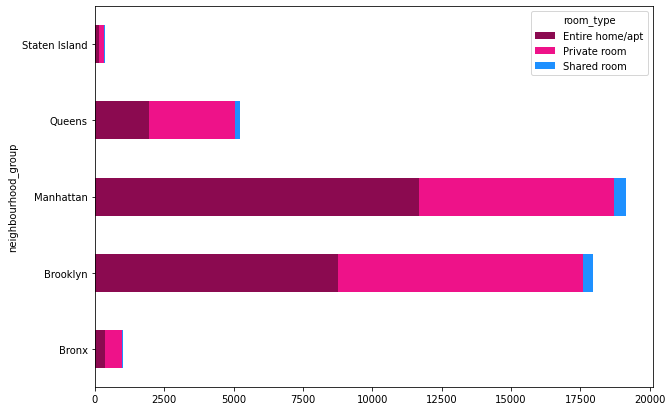

In [ ]:
neighbourhood_roomtype = newyork.groupby(by=['neighbourhood_group','room_type'],sort=False)['id'].agg([('count','count')]).reset_index().sort_values(by='count',ascending=False)
neighbourhood_roomtype
list = ['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island']
neightbourhoodgroup_roomtype = neighbourhood_roomtype[neighbourhood_roomtype.neighbourhood_group.str.contains('|'.join(list))]
neightbourhoodgroup_roomtype 
pivot_df = neightbourhoodgroup_roomtype.pivot(index='neighbourhood_group', columns='room_type', values='count')
pivot_df
colors = ["#8B0A50", "#EE1289","#1E90FF"]

pivot_df.loc[:,['Entire home/apt','Private room', 'Shared room']].plot.barh(stacked=True, color=colors, figsize=(10,7))

In [ ]:
#People generally prefer Entire home/apt and private room over shared room

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000.]),
 <a list of 7 Text major ticklabel objects>)

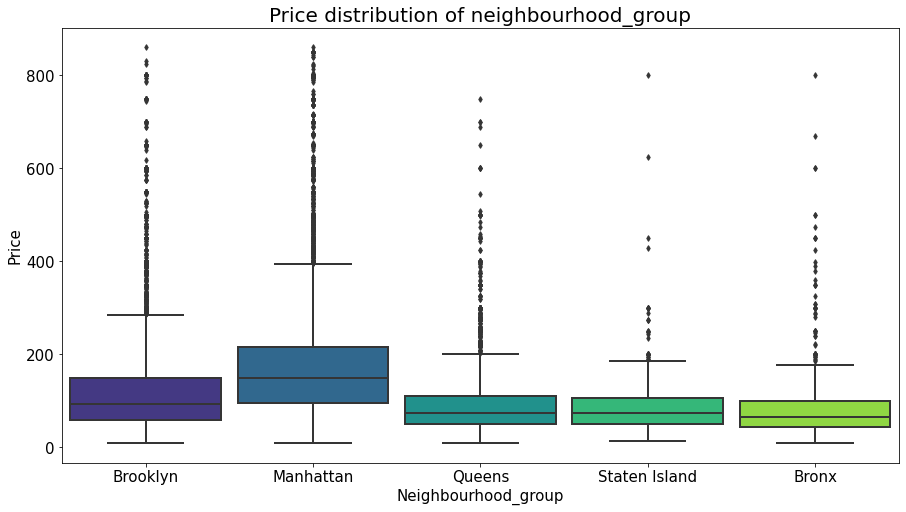

In [ ]:
plt.figure(figsize=(15,8))

# The plot
sns.boxplot(x = 'neighbourhood_group',
            y = 'price', data = newyork, palette = "viridis", saturation = 1, width = 0.9, fliersize=4, linewidth=2)

# Make pretty
plt.title('Price distribution of neighbourhood_group', fontsize = 20)
plt.xlabel('Neighbourhood_group', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

From the above box plot we can say that Manhattan has the highest range of prices with average 174 dollars, after that Brooklyn comes with average 116 dollars. Queens and Staten Island have similar distribution and Bronx has lowest average that means it is the cheapest among all. Manhattan has highest value of Q1 that means it is the most expensive place.

For more granular view on popularity let's find out top neighbourhoods for given neighbourhood group.

In [ ]:
pip install plotly --upgrade

     |████████████████████████████████| 13.1MB 302kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
listing_per_neighborhoodgroup = newyork.groupby(['neighbourhood_group','neighbourhood'],sort=False)['id'].agg([('count','count')]).reset_index().sort_values(by=['neighbourhood_group','count'],ascending=[True,False])
listing_per_neighborhoodgroup
top_10 = listing_per_neighborhoodgroup.groupby(['neighbourhood_group']).apply(lambda x: x.nlargest(10,'count'))
top_10['newyork'] = 'newyork' # in order to have a single root node
top_10
fig = px.treemap(top_10, path=['newyork', 'neighbourhood_group', 'neighbourhood'], values='count', color='neighbourhood',color_continuous_scale='RdBu')
fig.show()

Though Manhattan is the most popular neighbuorhood group in Newyork Airbnb, two neighbourhoods Williamsburg and Bedford- Stuyvesant from Brooklyn are the most rented.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'price')

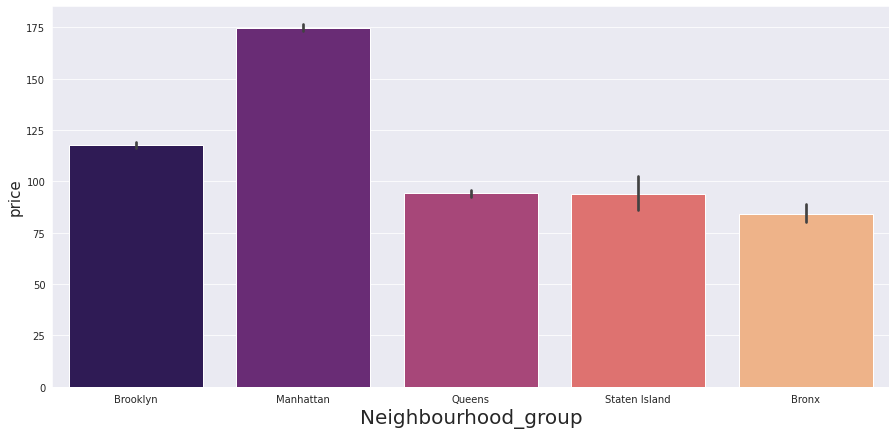

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,7))
sns.barplot(newyork.neighbourhood_group,newyork.price,palette='magma')
plt.xlabel('Neighbourhood_group',fontsize=20)
plt.ylabel('price',fontsize=15)

In [ ]:
pip install geopandas

     |████████████████████████████████| 972kB 3.4MB/s 
     |████████████████████████████████| 14.8MB 264kB/s 
     |████████████████████████████████| 6.5MB 25.5MB/s 


In [ ]:
import geopandas
crs = {'init':'epsg:4326'}
geometry = geopandas.points_from_xy(newyork.longitude, newyork.latitude)
geo_data = geopandas.GeoDataFrame(newyork,crs=crs,geometry=geometry)
nyc = geopandas.read_file(geopandas.datasets.get_path('nybb'))
nyc = nyc.to_crs(epsg=4326)

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



(-74.28337047811617, -73.67222994890714, 40.47514452612889, 40.93650364504159)

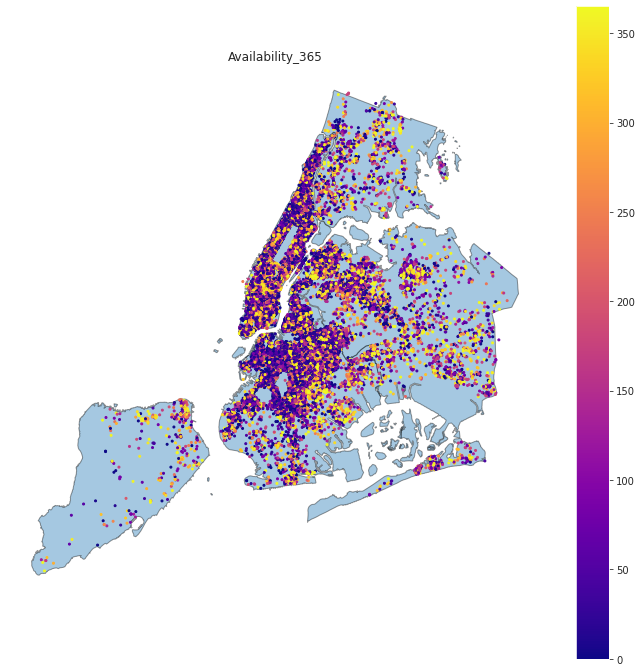

In [ ]:
fig,ax = plt.subplots(figsize=(12,12))
nyc.plot(ax=ax,alpha=0.4,edgecolor='black')
geo_data.plot(column='availability_365',ax=ax,legend=True,cmap='plasma',markersize=4)

plt.title("Availability_365")
plt.axis('off')

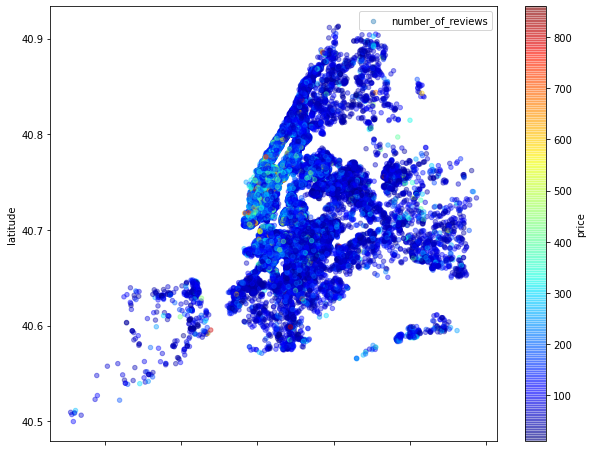

In [ ]:
#let's what we can do with our given longtitude and latitude columns

#let's see how scatterplot will come out 
viz_4=newyork.plot(kind='scatter', x='longitude', y='latitude', label='number_of_reviews', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
viz_4.legend()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



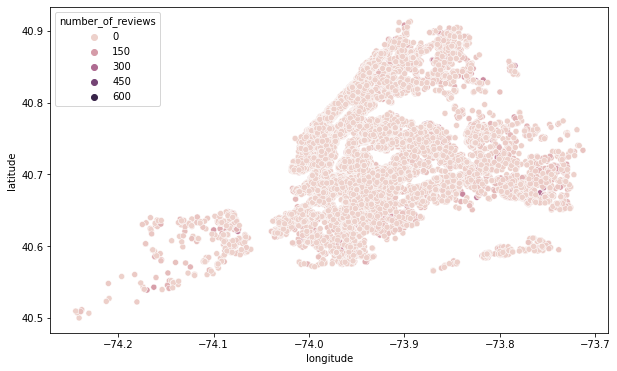

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(newyork.longitude,newyork.latitude,hue=newyork.number_of_reviews)
plt.ioff()

In [ ]:
top_reviewed_listings=newyork.nlargest(20,'number_of_reviews')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'reviews')

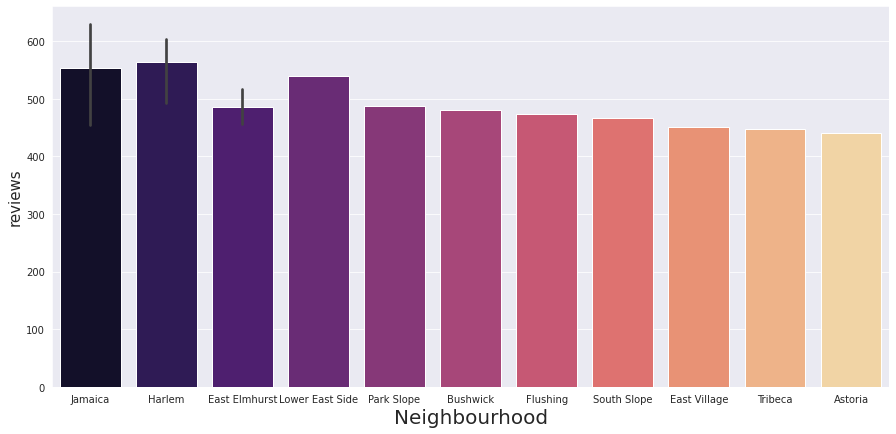

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,7))
sns.barplot(top_reviewed_listings.neighbourhood,top_reviewed_listings.number_of_reviews,palette='magma')
plt.xlabel('Neighbourhood',fontsize=20)
plt.ylabel('Reviews',fontsize=15)

In [ ]:
pip install wordcloud

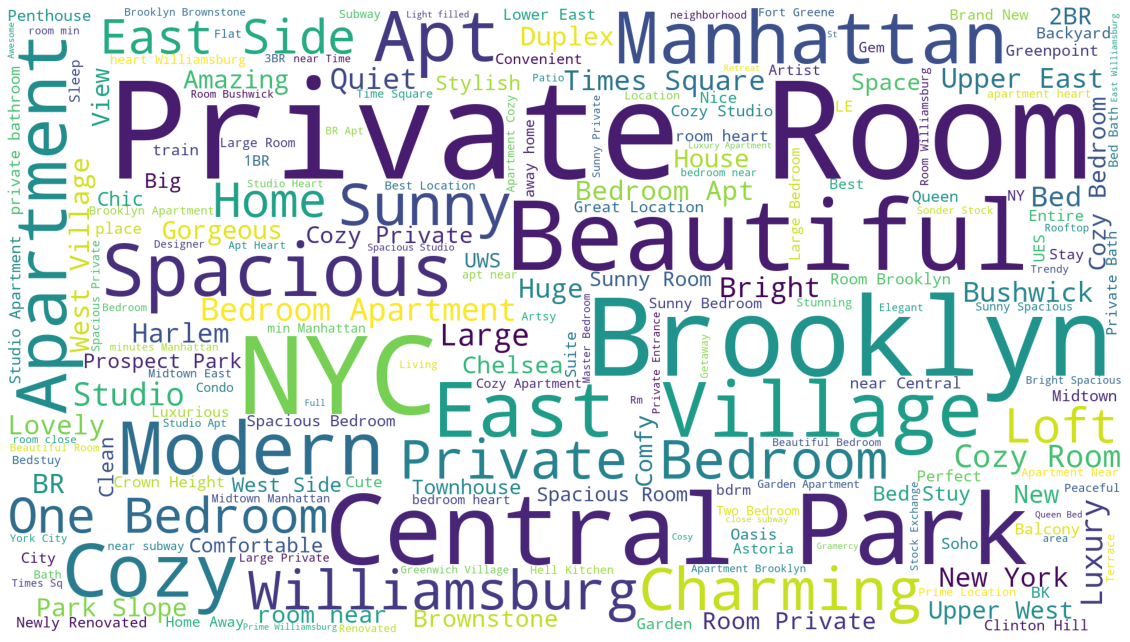

In [ ]:
from wordcloud import WordCloud
plt.subplots(figsize=(20,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(newyork.name))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.show()

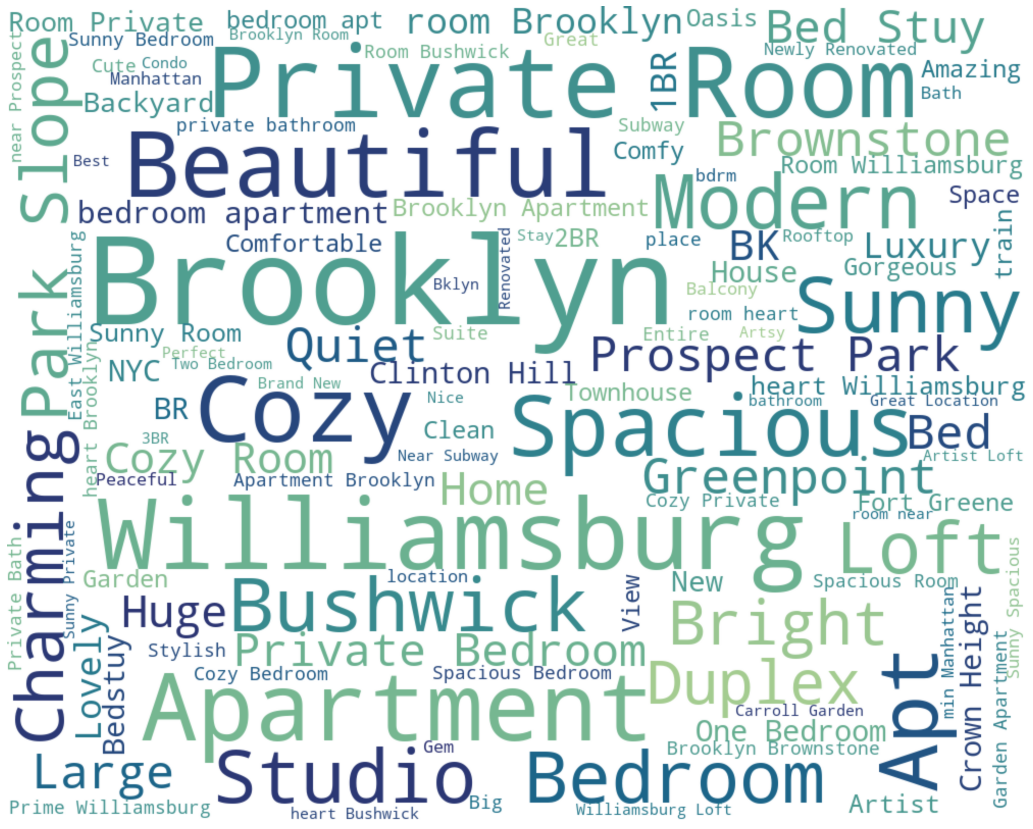

In [ ]:
from wordcloud import WordCloud

# Visualizing the most used words in the names of the most expensive Airbnbs in Brooklyn
airbnb_brooklyn = newyork[newyork['neighbourhood_group'] == 'Brooklyn']
word_cloud = WordCloud(width = 1000,
                       height = 800,
                       colormap = 'crest', 
                       margin = 0,
                       max_words = 200,  
                       max_font_size = 120, min_font_size = 15,  
                       background_color = "white").generate(" ".join(airbnb_brooklyn['name']))

plt.figure(figsize = (20, 15))
plt.imshow(word_cloud, interpolation = "gaussian")
plt.axis("off")
plt.show()

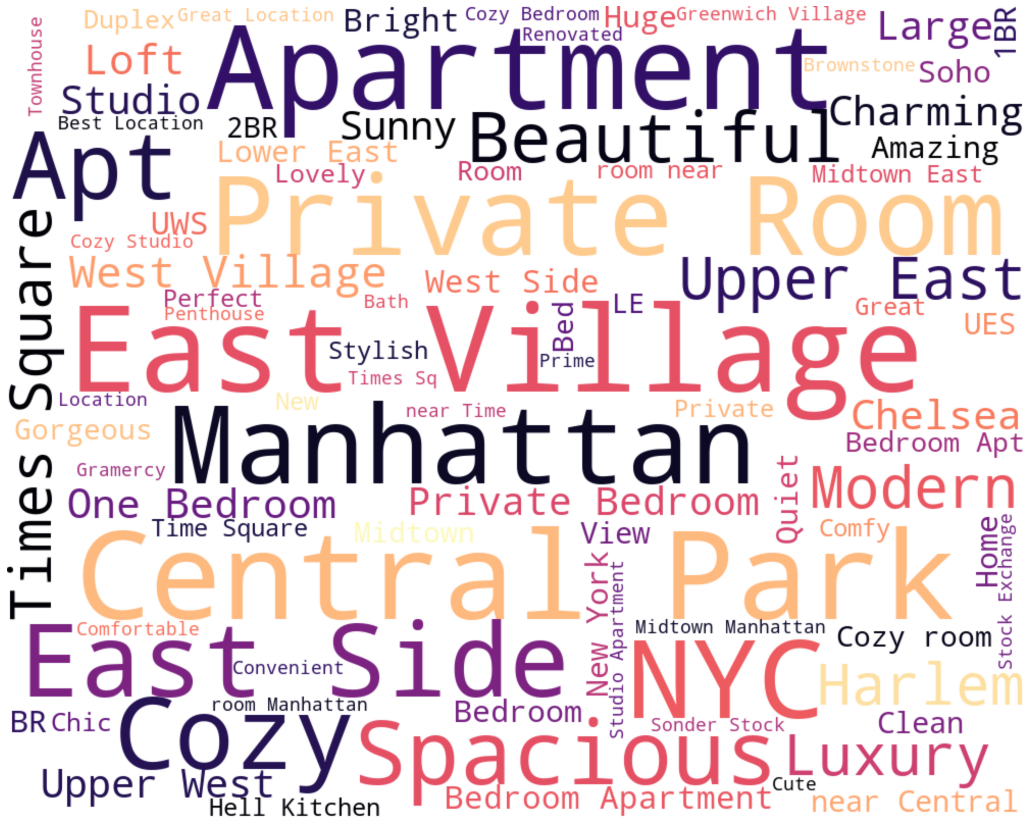

In [ ]:
from wordcloud import WordCloud

# Visualizing the most used words in the names of the most expensive Airbnbs in Brooklyn
airbnb_Manhattan = newyork[newyork['neighbourhood_group'] == 'Manhattan']
word_cloud = WordCloud(width = 1000,
                       height = 800,
                       colormap = 'magma', 
                       margin = 0,
                       max_words = 200,  
                       max_font_size = 120, min_font_size = 15,  
                       background_color = "white").generate(" ".join(airbnb_Manhattan['name']))

plt.figure(figsize = (20, 15))
plt.imshow(word_cloud, interpolation = "gaussian")
plt.axis("off")
plt.show()

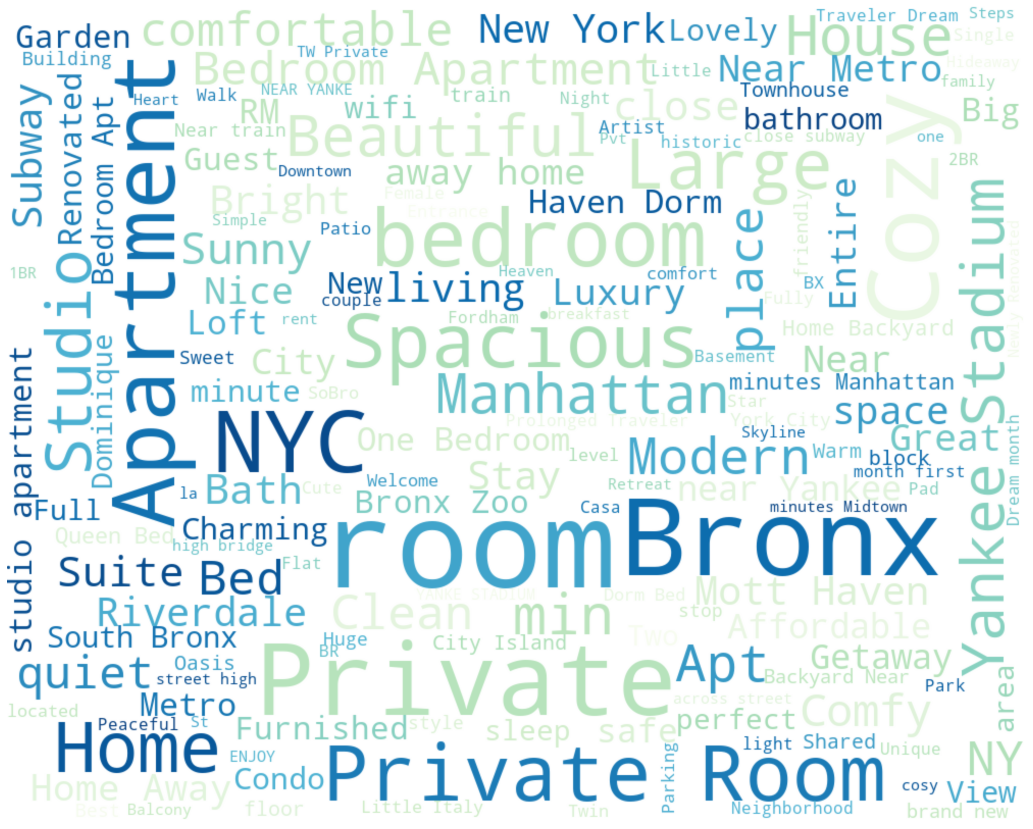

In [ ]:
from wordcloud import WordCloud

# Visualizing the most used words in the names of the most expensive Airbnbs in Brooklyn
airbnb_bronx = newyork[newyork['neighbourhood_group'] == 'Bronx']
word_cloud = WordCloud(width = 1000,
                       height = 800,
                       colormap = 'GnBu', 
                       margin = 0,
                       max_words = 200,  
                       max_font_size = 120, min_font_size = 15,  
                       background_color = "white").generate(" ".join(airbnb_bronx['name']))

plt.figure(figsize = (20, 15))
plt.imshow(word_cloud, interpolation = "gaussian")
plt.axis("off")
plt.show()

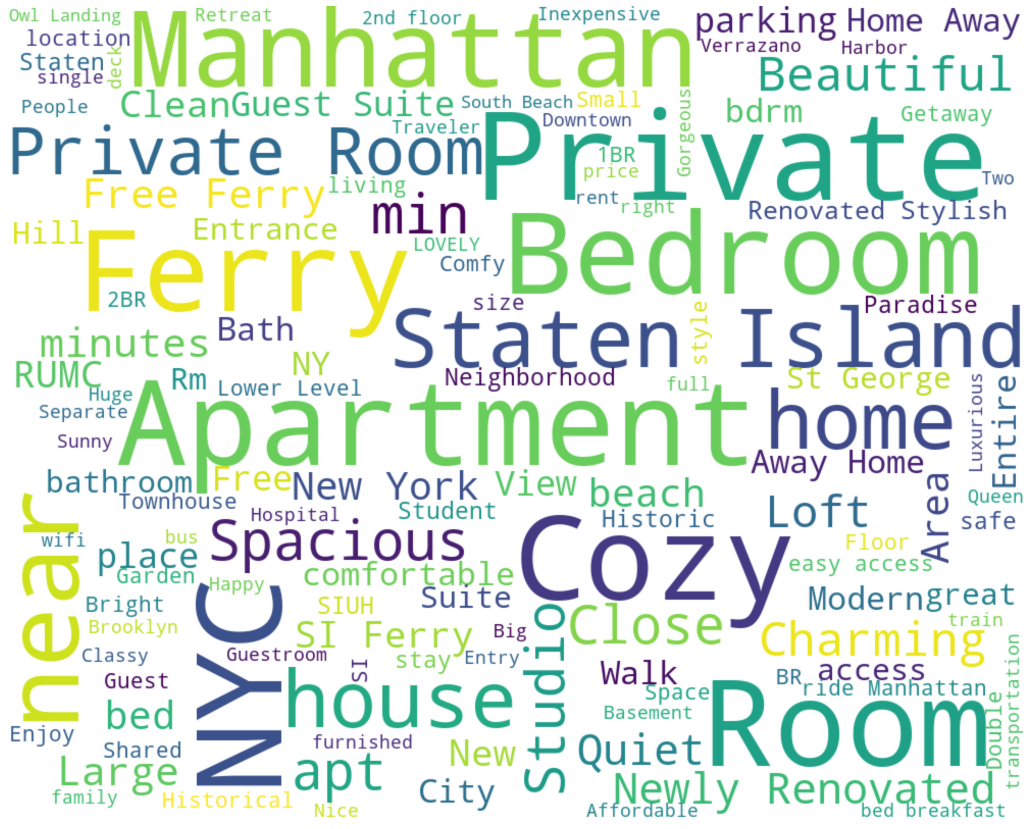

In [ ]:
from wordcloud import WordCloud

# Visualizing the most used words in the names of the most expensive Airbnbs in Brooklyn
airbnb_Staten_Island = newyork[newyork['neighbourhood_group'] == 'Staten Island']
word_cloud = WordCloud(width = 1000,
                       height = 800,
                       colormap = 'viridis', 
                       margin = 0,
                       max_words = 200,  
                       max_font_size = 120, min_font_size = 15,  
                       background_color = "white").generate(" ".join(airbnb_Staten_Island['name']))

plt.figure(figsize = (20, 15))
plt.imshow(word_cloud, interpolation = "gaussian")
plt.axis("off")
plt.show()

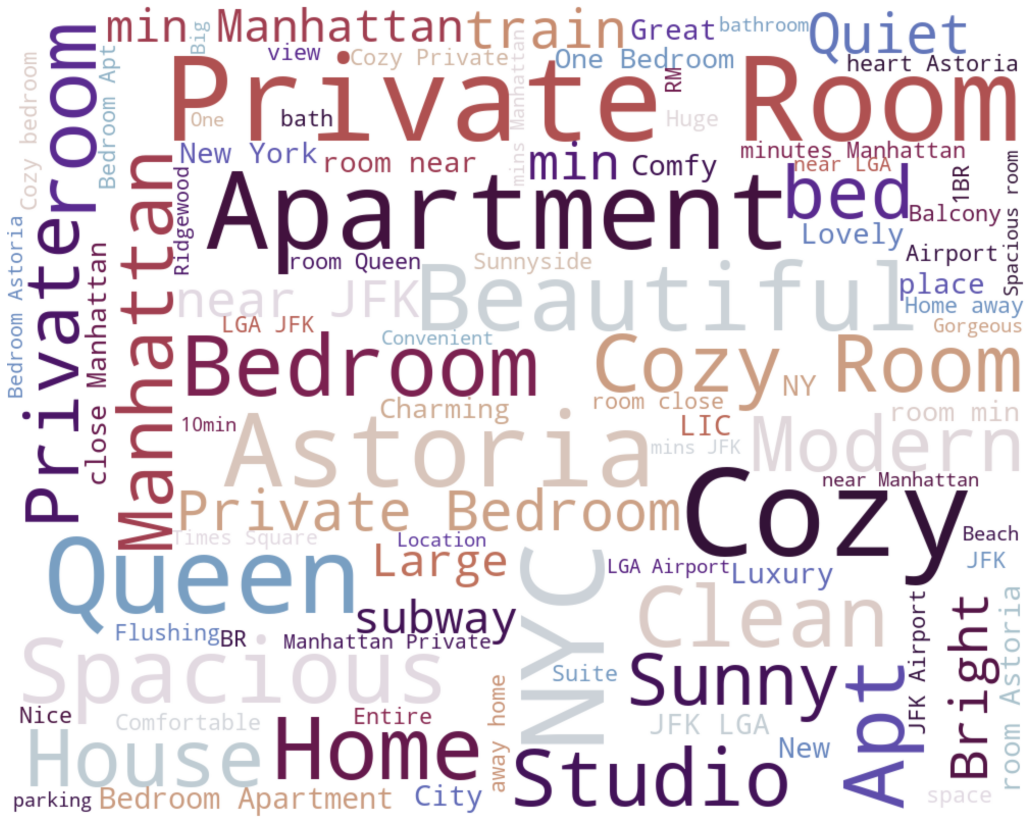

In [ ]:
from wordcloud import WordCloud

# Visualizing the most used words in the names of the most expensive Airbnbs in Brooklyn
airbnb_queens = newyork[newyork['neighbourhood_group'] == 'Queens']
word_cloud = WordCloud(width = 1000,
                       height = 800,
                       colormap = 'twilight_shifted', 
                       margin = 0,
                       max_words = 200,  
                       max_font_size = 120, min_font_size = 15,  
                       background_color = "white").generate(" ".join(airbnb_queens['name']))

plt.figure(figsize = (20, 15))
plt.imshow(word_cloud, interpolation = "gaussian")
plt.axis("off")
plt.show()

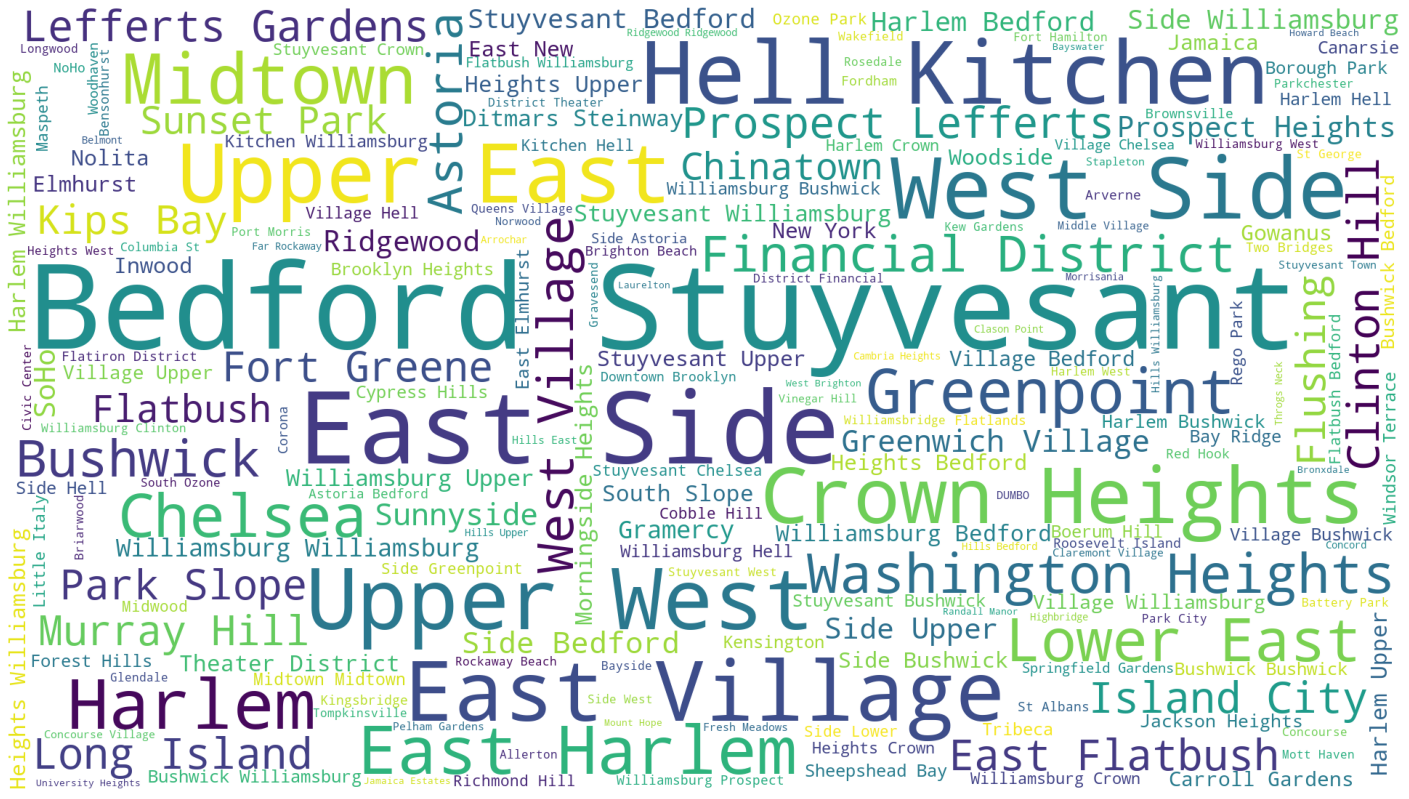

In [ ]:
most_reviews = newyork.sort_values(by = 'number_of_reviews', ascending = False)
from wordcloud import WordCloud
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(most_reviews['neighbourhood']))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.show()